In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [70]:
df = pd.read_json("results/task1/task1_data.json", lines=True)
#replace llama3.2 in the model column with llama3b
df['model'] = df['model'].replace('llama3.2', 'llama3b').replace('llama3.3', 'llama70b')
#replace llama3.2 in the model column with llama3b

#replace llama3.2 in the model column with llama3b
df['prompt'] = df['prompt'].replace('no', 'benchmark').replace('prompt1', 'persona')

df.drop(columns=['all_fit'], inplace=True)

df.rename(
    columns={
        'c_all_fit_hits': 'correct_match',
        'r_all_fit_hits': 'related_match',
        'r_all_fit_recall': 'related_recall'
    },
    inplace=True
)

code_path = "datasets/occupation.xlsx"
zone_path = "datasets/job_zone.xlsx"
# Read the Excel file
occupation = pd.read_excel(code_path)
occupation.drop(columns=['Description'], inplace=True)
occupation.columns = ['code', 'title']

zone = pd.read_excel(zone_path)
zone = zone[['Title', 'Job Zone']]
zone.columns = ['title', 'zone']

# Merge the occupation data with the main dataframe
df = df.merge(occupation, left_on='title', right_on='title', how='left')
df = df.merge(zone, left_on='title', right_on='title', how='left')
df["industry"] = df["code"].apply(lambda x: x.split("-")[0])
df

title  iteration  \
0                                      Chief Executives          0   
1                         Chief Sustainability Officers          0   
2                       General and Operations Managers          0   
3                                           Legislators          0   
4                   Advertising and Promotions Managers          0   
...                                                 ...        ...   
73835  Gas Compressor and Gas Pumping Station Operators          9   
73836           Pump Operators, Except Wellhead Pumpers          9   
73837                                  Wellhead Pumpers          9   
73838         Refuse and Recyclable Material Collectors          9   
73839                 Tank Car, Truck, and Ship Loaders          9   

       correct_match  related_match  related_recall        model     prompt  \
0                  1              1             0.5  deepseek-r1  benchmark   
1                  1              1             0.1  deepseek-r1  benchmark   
2                  0              0             0.0  deepseek-r1  benchmark   
3                  0              0             0.0  deepseek-r1  benchmark   
4                  0              1             0.9  deepseek-r1  benchmark   
...              ...            ...             ...          ...        ...   
73835              0              1             0.2      mistral    persona   
73836              0              0             0.0      mistral    persona   
73837              0              0             0.0      mistral    persona   
73838              0              0             0.0      mistral    persona   
73839              0              0             0.0      mistral    persona   

             code  zone industry  
0      11-1011.00     5       11  
1      11-1011.03     5       11  
2      11-1021.00     4       11  
3      11-1031.00     4       11  
4      11-2011.00     4       11  
...           ...   ...      ...  
73835  53-7071.00     2       53  
73836  53-7072.00     2       53  
73837  53-7073.00     2       53  
73838  53-7081.00     2       53  
73839  53-7121.00     2       53  

[73840 rows x 10 columns]

In [173]:
df_avg = df.groupby(["title", "model", "prompt", "code", "zone", "industry"]).mean().reset_index().drop(columns=["iteration"])
df_avg

title        model     prompt        code  \
0               Accountants and Auditors  deepseek-r1  benchmark  13-2011.00   
1               Accountants and Auditors  deepseek-r1    persona  13-2011.00   
2               Accountants and Auditors      llama3b  benchmark  13-2011.00   
3               Accountants and Auditors      llama3b    persona  13-2011.00   
4               Accountants and Auditors     llama70b  benchmark  13-2011.00   
...                                  ...          ...        ...         ...   
7379  Zoologists and Wildlife Biologists      llama3b    persona  19-1023.00   
7380  Zoologists and Wildlife Biologists     llama70b  benchmark  19-1023.00   
7381  Zoologists and Wildlife Biologists     llama70b    persona  19-1023.00   
7382  Zoologists and Wildlife Biologists      mistral  benchmark  19-1023.00   
7383  Zoologists and Wildlife Biologists      mistral    persona  19-1023.00   

      zone industry  correct_match  related_match  related_recall  
0        4       13            0.0            0.0            0.00  
1        4       13            0.0            1.0            0.59  
2        4       13            0.0            1.0            0.56  
3        4       13            0.0            1.0            0.60  
4        4       13            0.0            1.0            0.56  
...    ...      ...            ...            ...             ...  
7379     4       19            0.0            1.0            0.40  
7380     4       19            0.0            1.0            0.33  
7381     4       19            0.0            1.0            0.39  
7382     4       19            0.0            0.0            0.00  
7383     4       19            0.0            1.0            0.16  

[7384 rows x 9 columns]

In [73]:
df_pivot = df.pivot_table(index=["title", "industry", "zone", "model", "iteration"], columns=["prompt"], values="correct_match").reset_index()
df_pivot["difference"] = df_pivot["persona"] - df_pivot["benchmark"]
df_related_hit_pivot = df.pivot_table(index=["title", "industry", "zone", "model", "iteration"], columns=["prompt"], values="related_match").reset_index()
df_related_hit_pivot["difference"] = df_related_hit_pivot["persona"] - df_related_hit_pivot["benchmark"]
df_recall_pivot = df.pivot_table(index=["title", "industry", "zone", "model", "iteration"], columns=["prompt"], values="related_recall").reset_index()
df_recall_pivot["difference"] = df_recall_pivot["persona"] - df_recall_pivot["benchmark"]
df_pivot

prompt                               title industry  zone        model  \
0                 Accountants and Auditors       13     4  deepseek-r1   
1                 Accountants and Auditors       13     4  deepseek-r1   
2                 Accountants and Auditors       13     4  deepseek-r1   
3                 Accountants and Auditors       13     4  deepseek-r1   
4                 Accountants and Auditors       13     4  deepseek-r1   
...                                    ...      ...   ...          ...   
36915   Zoologists and Wildlife Biologists       19     4      mistral   
36916   Zoologists and Wildlife Biologists       19     4      mistral   
36917   Zoologists and Wildlife Biologists       19     4      mistral   
36918   Zoologists and Wildlife Biologists       19     4      mistral   
36919   Zoologists and Wildlife Biologists       19     4      mistral   

prompt  iteration  benchmark  persona  difference  
0               0        0.0      0.0         0.0  
1               1        0.0      0.0         0.0  
2               2        0.0      0.0         0.0  
3               3        0.0      0.0         0.0  
4               4        0.0      0.0         0.0  
...           ...        ...      ...         ...  
36915           5        0.0      0.0         0.0  
36916           6        0.0      0.0         0.0  
36917           7        0.0      0.0         0.0  
36918           8        0.0      0.0         0.0  
36919           9        0.0      0.0         0.0  

[36920 rows x 8 columns]

In [33]:
deepseek = df_avg[df_avg["model"] == "deepseek-r1"]
llama3b = df_avg[df_avg["model"] == "llama3b"]
llama70b = df_avg[df_avg["model"] == "llama70b"]
mistral = df_avg[df_avg["model"] == "mistral"]

### Descriptive Stats

### Correct Match

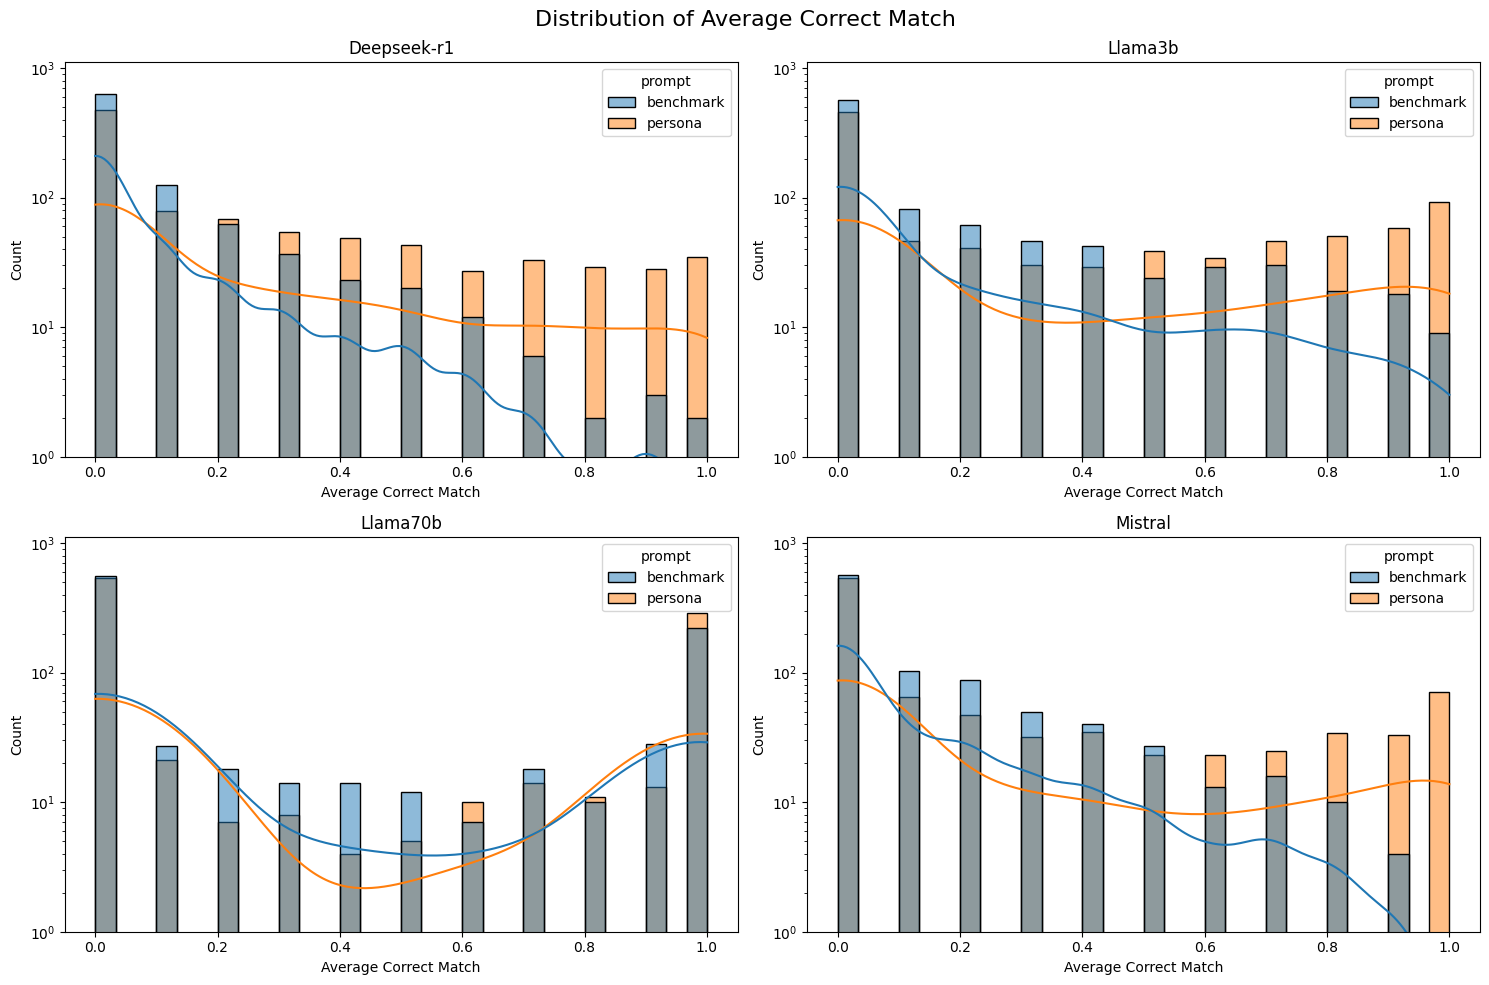

In [6]:
plt.figure(figsize=(15, 10))

# Calculate the maximum y-value across all plots
max_y = max(
    deepseek["correct_match"].value_counts().max(),
    llama3b["correct_match"].value_counts().max(),
    llama70b["correct_match"].value_counts().max(),
    mistral["correct_match"].value_counts().max()
)
#add a title to the plot
plt.suptitle("Distribution of Average Correct Match", fontsize=16)
# Plot the distribution of the data
plt.subplot(2, 2, 1)
sns.histplot(data=deepseek, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Deepseek-r1")

plt.subplot(2, 2, 2)
sns.histplot(data=llama3b, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Llama3b")

plt.subplot(2, 2, 3)
sns.histplot(data=llama70b, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Llama70b")

plt.subplot(2, 2, 4)
sns.histplot(data=mistral, x="correct_match", hue="prompt", bins=30, kde=True, alpha=0.5)
plt.xlabel("Average Correct Match")
plt.yscale('log')
plt.ylim(1, max_y)  # Set the same y-axis limit
plt.title("Mistral")

plt.tight_layout()
plt.show()

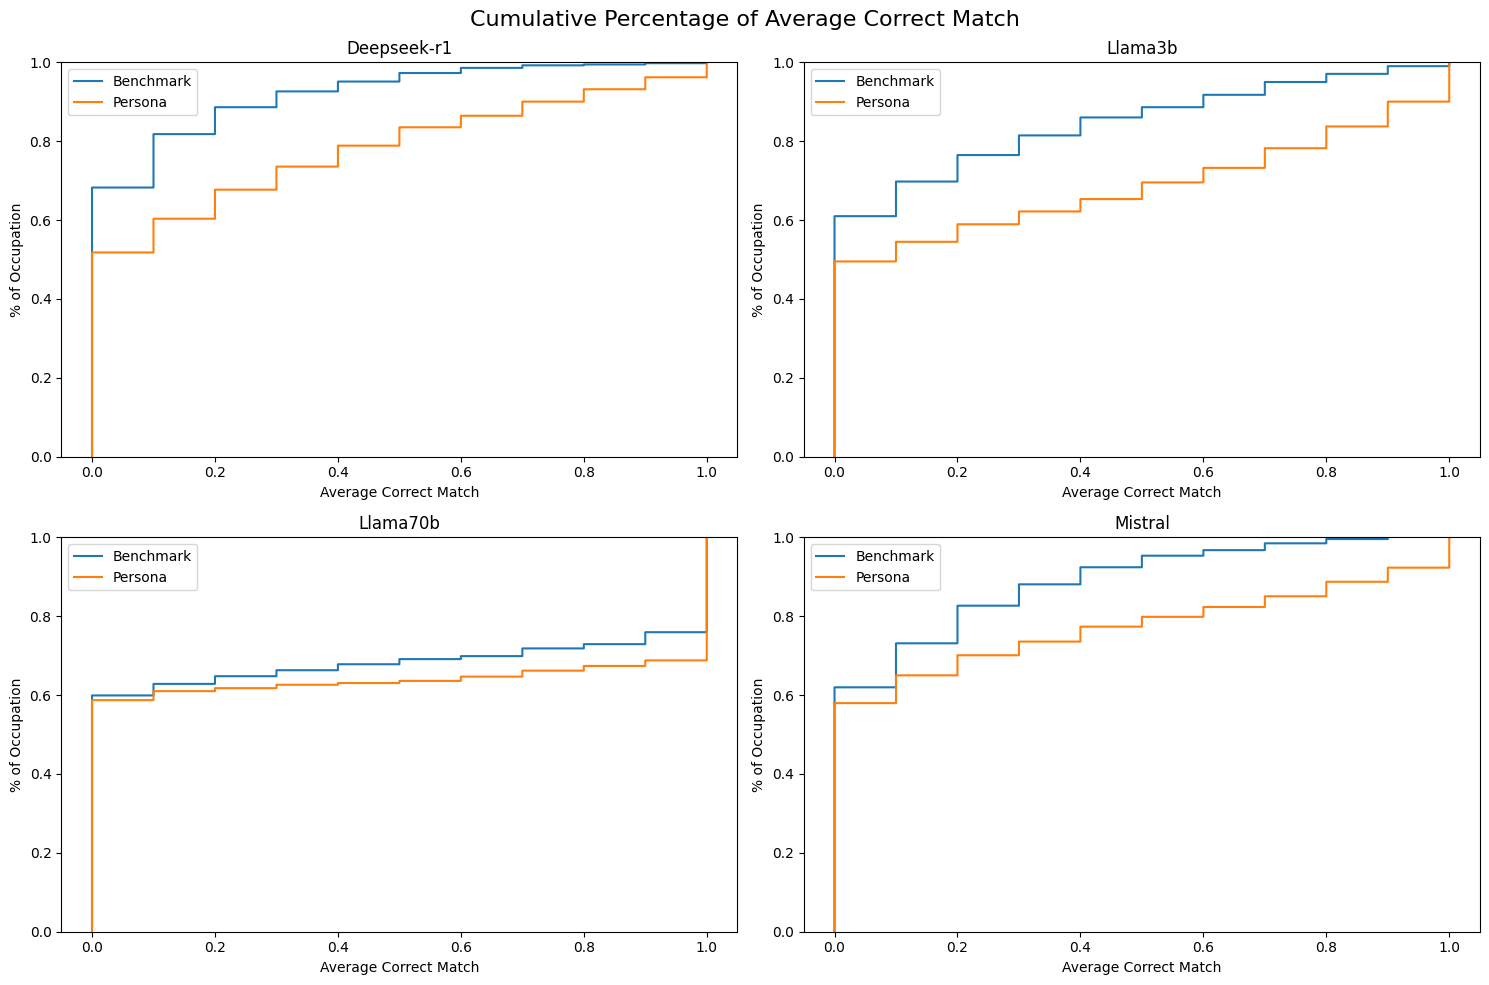

In [265]:
models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]
plt.figure(figsize=(15, 10))
plt.suptitle("Cumulative Percentage of Average Correct Match", fontsize=16)
for i, model in enumerate(models, 1):
    plt.subplot(2, 2, i)
    for prompt in ["benchmark", "persona"]:
        data_subset = df_avg[(df_avg["model"] == model) & (df_avg["prompt"] == prompt)]
        sns.ecdfplot(data=data_subset, x="correct_match", label=prompt.capitalize(), )
    plt.title(f"{model.capitalize()}")
    plt.xlabel("Average Correct Match")
    plt.ylabel("% of Occupation")
    plt.legend()

plt.tight_layout()
plt.show()

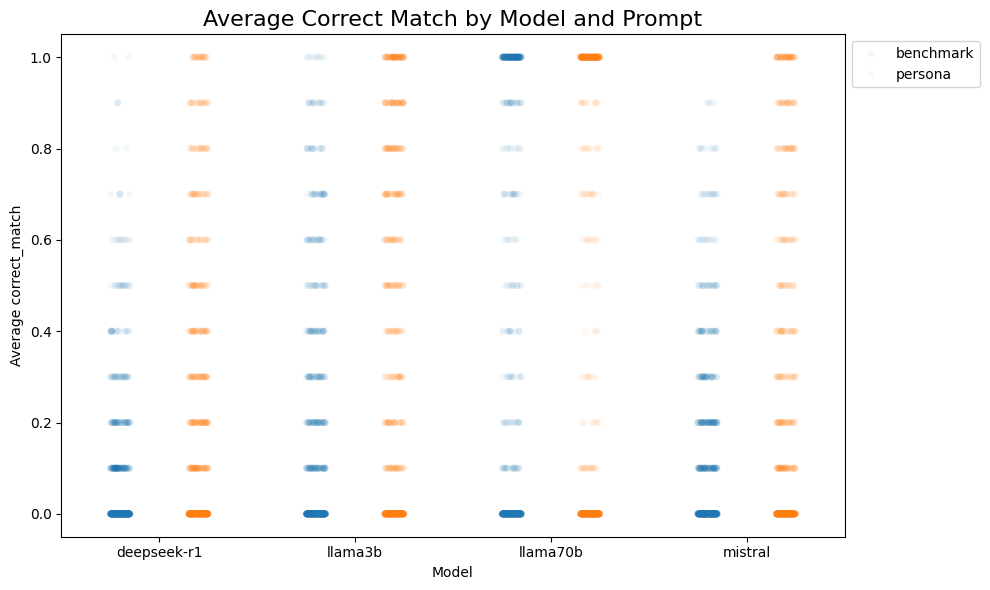

In [8]:
# Calculate the average correct_match for each model and prompt
avg_hits = df_avg.groupby(["model", "prompt"])["correct_match"].mean().reset_index()

# Create a single barplot
plt.figure(figsize=(10, 6))
# sns.violinplot(data=df_avg, x="model", y="correct_match", hue="prompt", bw_adjust=3)
sns.stripplot(data=df_avg, x="model", y="correct_match", hue="prompt", dodge=True, 
              size=5, alpha=0.05, jitter=True)

# Add labels and title
plt.title("Average Correct Match by Model and Prompt", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Average correct_match")
 # Ensure some padding on the y-axis, no box around the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]

for model in models:
    # Filter the dataframe for the current model
    model_data = df_pivot[df_pivot['model'] == model].copy()
    model_data = model_data.groupby(["title", "model", "code", "zone"]).mean().reset_index().drop(columns=["iteration"])
    model_data['difference'] = model_data['persona'] - model_data['benchmark']

    # Perform the Wilcoxon signed-rank test on the differences
    statistic, p_value = stats.wilcoxon(model_data['persona'], model_data["benchmark"], alternative='greater')
    # Print the results

    print(f"Model: {model}")
    print("Wilcoxon Signed-Rank Test Results:")
    print(f"  W-statistic: {statistic:.4f}")
    print(f"  p-value: {p_value:.4f}")

    # Interpretation of the p-value
    alpha = 0.01  # significance level
    if p_value < alpha:
        print(f"\nThe p-value ({p_value:.4f}) is less than the significance level ({alpha}).")
        print("This suggests that there is a statistically significant difference in the similarity scores")
        print("between the benchmark and persona conditions across all occupations and iterations.")
        print("We reject the null hypothesis that there is no difference.")
    else:
        print(f"\nThe p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}).")
        print("This suggests that there is no statistically significant difference in the similarity scores")
        print("between the benchmark and persona conditions across all occupations and iterations.")
        print("We fail to reject the null hypothesis.")
    print("\n" + "-" * 50 + "\n")


Model: deepseek-r1
Wilcoxon Signed-Rank Test Results:
  W-statistic: 80041.5000
  p-value: 0.0000

The p-value (0.0000) is less than the significance level (0.01).
This suggests that there is a statistically significant difference in the similarity scores
between the benchmark and persona conditions across all occupations and iterations.
We reject the null hypothesis that there is no difference.

--------------------------------------------------

Model: llama3b
Wilcoxon Signed-Rank Test Results:
  W-statistic: 90229.0000
  p-value: 0.0000

The p-value (0.0000) is less than the significance level (0.01).
This suggests that there is a statistically significant difference in the similarity scores
between the benchmark and persona conditions across all occupations and iterations.
We reject the null hypothesis that there is no difference.

--------------------------------------------------

Model: llama70b
Wilcoxon Signed-Rank Test Results:
  W-statistic: 13991.0000
  p-value: 0.0000

The 

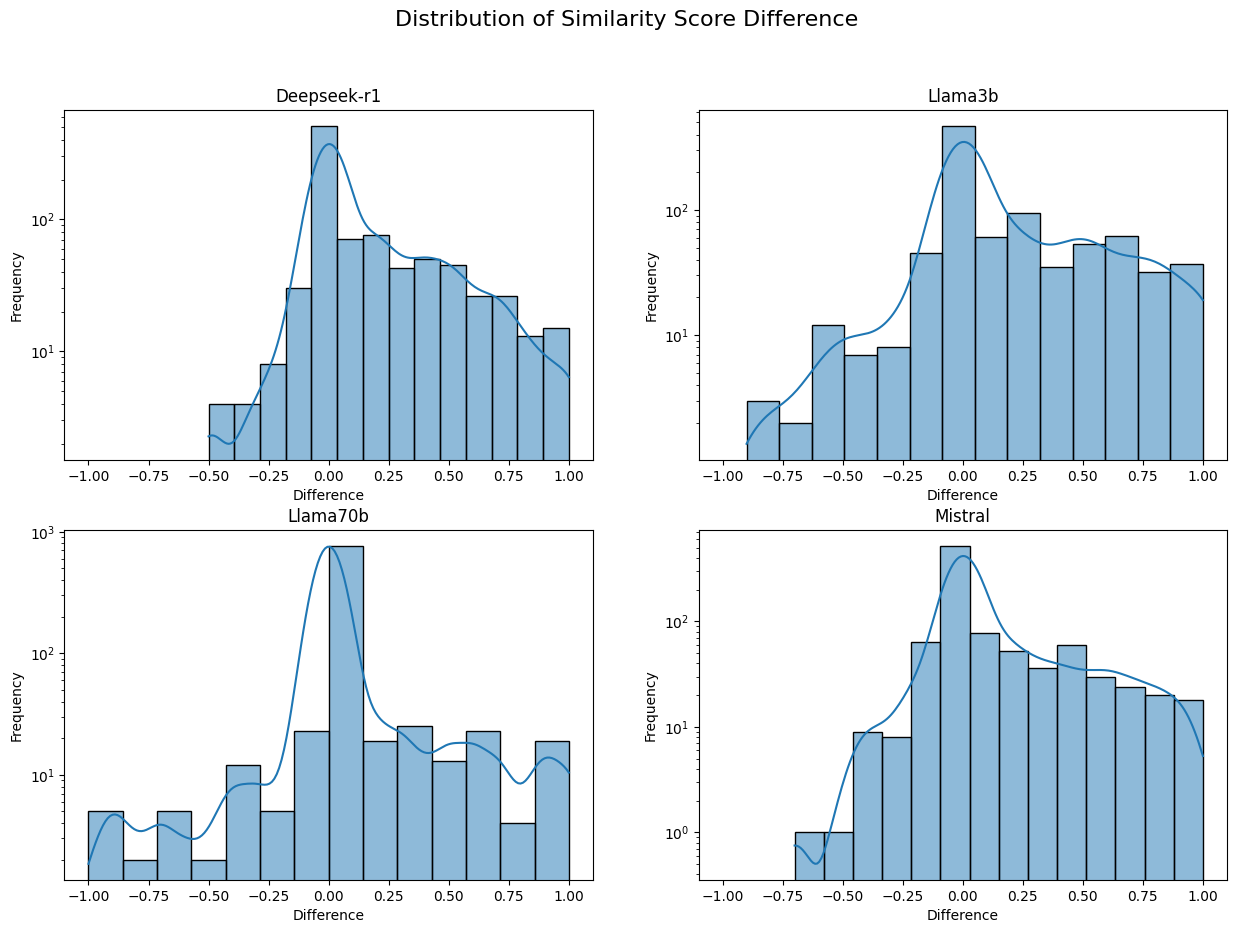

In [ ]:
models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]

plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Similarity Score Difference", fontsize=16)
for i, model in enumerate(models, 1):
    plt.subplot(2, 2, i)
    data_subset = df_pivot[(df_pivot["model"] == model)]
    data_subset = data_subset.groupby('title')['difference'].mean().reset_index()
    sns.histplot(data=data_subset, x="difference", bins=14, kde=True)
    plt.title(f"{model.capitalize()}")
    # plt.ylim(1, max_y)  # Set the same y-axis limit
    plt.xlim(-1.1, 1.1)  # Set the same x-axis limit
    plt.xlabel("Difference")
    plt.yscale('log')
    plt.ylabel("Frequency")

## correct match by industry and zone

In [78]:
df_pivot

prompt                               title industry  zone        model  \
0                 Accountants and Auditors       13     4  deepseek-r1   
1                 Accountants and Auditors       13     4  deepseek-r1   
2                 Accountants and Auditors       13     4  deepseek-r1   
3                 Accountants and Auditors       13     4  deepseek-r1   
4                 Accountants and Auditors       13     4  deepseek-r1   
...                                    ...      ...   ...          ...   
36915   Zoologists and Wildlife Biologists       19     4      mistral   
36916   Zoologists and Wildlife Biologists       19     4      mistral   
36917   Zoologists and Wildlife Biologists       19     4      mistral   
36918   Zoologists and Wildlife Biologists       19     4      mistral   
36919   Zoologists and Wildlife Biologists       19     4      mistral   

prompt  iteration  benchmark  persona  difference  
0               0        0.0      0.0         0.0  
1               1        0.0      0.0         0.0  
2               2        0.0      0.0         0.0  
3               3        0.0      0.0         0.0  
4               4        0.0      0.0         0.0  
...           ...        ...      ...         ...  
36915           5        0.0      0.0         0.0  
36916           6        0.0      0.0         0.0  
36917           7        0.0      0.0         0.0  
36918           8        0.0      0.0         0.0  
36919           9        0.0      0.0         0.0  

[36920 rows x 8 columns]

In [79]:
df_industry = df_pivot[["model", "iteration", "industry", "persona", "benchmark"]]
df_industry = df_industry.groupby(["model", "iteration", "industry"]).mean().reset_index()
df_industry

prompt        model  iteration industry   persona  benchmark
0       deepseek-r1          0       11  0.392857   0.285714
1       deepseek-r1          0       13  0.354167   0.062500
2       deepseek-r1          0       15  0.361111   0.166667
3       deepseek-r1          0       17  0.142857   0.000000
4       deepseek-r1          0       19  0.216667   0.050000
..              ...        ...      ...       ...        ...
875         mistral          9       45  0.166667   0.250000
876         mistral          9       47  0.114754   0.098361
877         mistral          9       49  0.140000   0.060000
878         mistral          9       51  0.056075   0.009346
879         mistral          9       53  0.134615   0.038462

[880 rows x 5 columns]

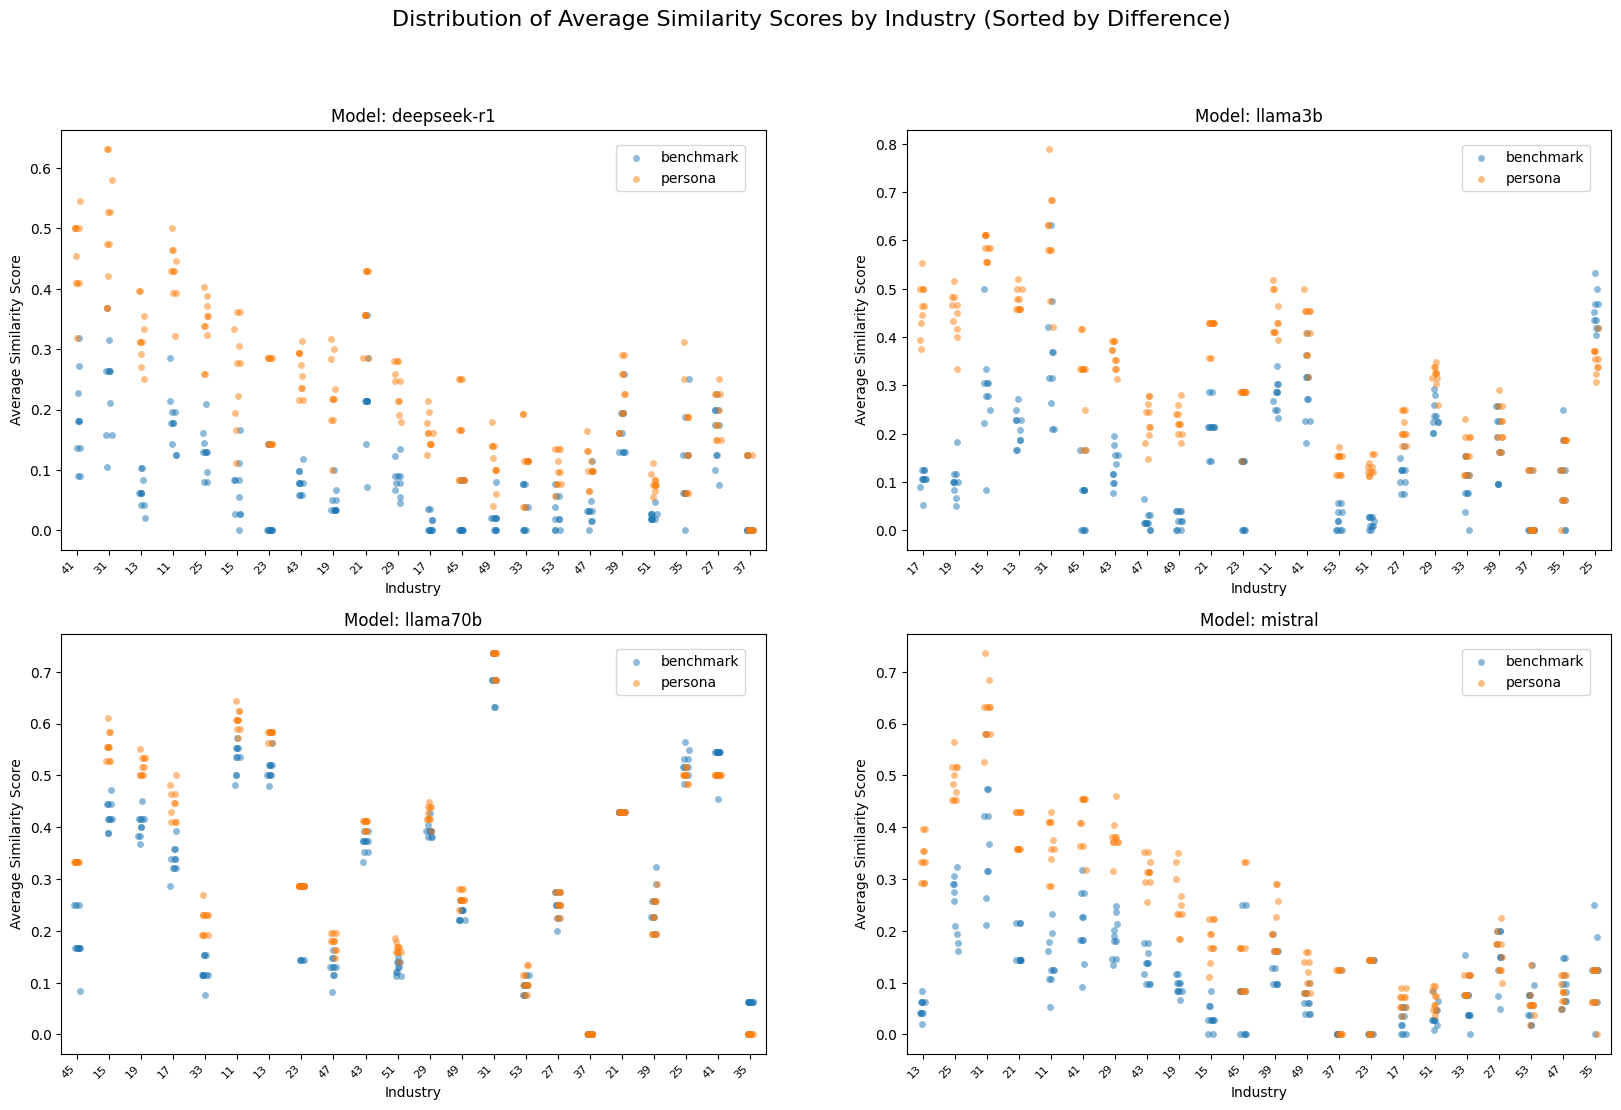

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

models = ["deepseek-r1", "llama3b", "llama70b", "mistral"]

# df_melted = df_industry.melt(id_vars=['industry', 'model'],
#                             value_vars=['benchmark', 'persona'],
#                             var_name='prompt_type',
#                             value_name='average_similarity_score')

plt.figure(figsize=(20, 12))
plt.suptitle("Distribution of Average Similarity Scores by Industry (Sorted by Difference)", fontsize=16)

for i, model in enumerate(models, 1):
    plt.subplot(2, 2, i)
    df_model = df_industry[df_industry['model'] == model].copy()

    # Calculate the difference for sorting industries
    df_diff = df_model.groupby('industry')[['benchmark', 'persona']].mean()
    df_diff['difference'] = df_diff['persona'] - df_diff['benchmark']
    df_diff_sorted = df_diff.sort_values(by='difference', ascending=False).index

    # Use the sorted order for the stripplot
    sns.stripplot(x='industry', y='benchmark', label='benchmark', data=df_model, dodge=False, alpha=0.5, order=df_diff_sorted)
    sns.stripplot(x='industry', y='persona', label='persona', data=df_model, dodge=False, alpha=0.5, order=df_diff_sorted)
    

    plt.title(f'Model: {model}')
    plt.xlabel('Industry')
    plt.ylabel('Average Similarity Score')
    plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust fontsize if needed
# Add the legend to the entire figure outside the loop
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[21:23], labels[21:23], loc='upper right', bbox_to_anchor=(0.98, 0.98))


plt.show()

In [167]:
import statsmodels.formula.api as smf
df_regression = df_pivot.groupby(["model", "title", "industry"]).mean().reset_index().drop(columns=["iteration"])
df_regression['industry'] = pd.Categorical(df_regression['industry'])
df_regression['zone'] = pd.Categorical(df_regression['zone'])
df_regression = df_regression.melt(id_vars=['model', 'title', 'industry', 'zone'],
                             value_vars=['benchmark', 'persona'],
                             var_name='prompt',
                             value_name='average_similarity_score')
df_regression = df_regression[df_regression['model'] == "deepseek-r1"].copy()
# Model the similarity score ('all_fit') as a function of prompt, industry, job_zone, and their interactions
formula_with_prompt = 'average_similarity_score ~ C(prompt)'# * C(industry)'
model_with_prompt = smf.ols(formula_with_prompt, data=df_regression)
results_with_prompt = model_with_prompt.fit()

print(results_with_prompt.summary())

                               OLS Regression Results                               
Dep. Variable:     average_similarity_score   R-squared:                       0.076
Model:                                  OLS   Adj. R-squared:                  0.076
Method:                       Least Squares   F-statistic:                     152.4
Date:                      Sat, 10 May 2025   Prob (F-statistic):           1.07e-33
Time:                              19:32:12   Log-Likelihood:                0.18635
No. Observations:                      1846   AIC:                             3.627
Df Residuals:                          1844   BIC:                             14.67
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [267]:
df_split = df_avg.copy()
df_split = df_split[df_split["model"] == "mistral"].copy()
df_no_match = df_split[df_split['correct_match'] == 0]
df_at_least_one_match = df_split[df_split['correct_match'] != 0]

print(f"Number of observations with no match: {len(df_no_match)}")
print(f"Number of observations with at least one match: {len(df_at_least_one_match)}")

Number of observations with no match: 1107
Number of observations with at least one match: 739


In [268]:
#correct match is 0 and prompt is persona
df_split[(df_split['correct_match'] == 0) & (df_split['prompt'] == "benchmark")]

title    model     prompt  \
6                              Accountants and Auditors  mistral  benchmark   
22                                            Actuaries  mistral  benchmark   
30                                       Acupuncturists  mistral  benchmark   
54       Adhesive Bonding Machine Operators and Tenders  mistral  benchmark   
62    Administrative Law Judges, Adjudicators, and H...  mistral  benchmark   
...                                                 ...      ...        ...   
7334                              Wind Energy Engineers  mistral  benchmark   
7358  Woodworking Machine Setters, Operators, and Te...  mistral  benchmark   
7366                        Word Processors and Typists  mistral  benchmark   
7374                                Writers and Authors  mistral  benchmark   
7382                 Zoologists and Wildlife Biologists  mistral  benchmark   

            code  zone industry  correct_match  related_match  related_recall  
6     13-2011.00     4       13            0.0            0.5            0.14  
22    15-2011.00     4       15            0.0            0.2            0.04  
30    29-1291.00     5       29            0.0            0.0            0.00  
54    51-9191.00     2       51            0.0            0.0            0.00  
62    23-1021.00     5       23            0.0            0.6            0.13  
...          ...   ...      ...            ...            ...             ...  
7334  17-2199.10     4       17            0.0            0.0            0.00  
7358  51-7042.00     2       51            0.0            0.0            0.00  
7366  43-9022.00     2       43            0.0            0.7            0.22  
7374  27-3043.00     4       27            0.0            0.5            0.06  
7382  19-1023.00     4       19            0.0            0.0            0.00  

[572 rows x 9 columns]

In [269]:
# Cross-tabulation for prompt
prompt_crosstab = pd.crosstab(df_split['prompt'], df_split['correct_match'] >0.1, normalize='index') * 100
print("\nPercentage of no match vs. at least one match by prompt:\n", prompt_crosstab)

# Chi-squared test for prompt
import scipy.stats as stats
contingency_prompt = pd.crosstab(df_split['prompt'], df_split['correct_match'] >0.1)
chi2_prompt, p_prompt, _, _ = stats.chi2_contingency(contingency_prompt)
print(f"\nChi-squared test for prompt: Chi2 = {chi2_prompt:.2f}, p-value = {p_prompt:.3f}")

# Cross-tabulation for industry
industry_crosstab = pd.crosstab(df_split['industry'], df_split['correct_match'] >0.1, normalize='index') * 100
print("\nPercentage of no match vs. at least one match by industry:\n", industry_crosstab)

# Chi-squared test for industry
contingency_industry = pd.crosstab(df_split['industry'], df_split['correct_match'] >0.1)
chi2_industry, p_industry, _, _ = stats.chi2_contingency(contingency_industry)
print(f"\nChi-squared test for industry: Chi2 = {chi2_industry:.2f}, p-value = {p_industry:.3f}")

# Cross-tabulation for zone
zone_crosstab = pd.crosstab(df_split['zone'], df_split['correct_match'] >0.1, normalize='index') * 100
print("\nPercentage of no match vs. at least one match by zone:\n", zone_crosstab)

# Chi-squared test for zone
contingency_zone = pd.crosstab(df_split['zone'], df_split['correct_match'] >0.1)
chi2_zone, p_zone, _, _ = stats.chi2_contingency(contingency_zone)
print(f"\nChi-squared test for zone: Chi2 = {chi2_zone:.2f}, p-value = {p_zone:.3f}")



Percentage of no match vs. at least one match by prompt:
 correct_match      False      True 
prompt                             
benchmark      73.131094  26.868906
persona        65.005417  34.994583

Chi-squared test for prompt: Chi2 = 13.89, p-value = 0.000

Percentage of no match vs. at least one match by industry:
 correct_match      False      True 
industry                           
11             57.142857  42.857143
13             69.791667  30.208333
15             83.333333  16.666667
17             89.285714  10.714286
19             66.666667  33.333333
21             64.285714  35.714286
23             85.714286  14.285714
25             41.129032  58.870968
27             68.750000  31.250000
29             49.438202  50.561798
31             13.157895  86.842105
33             84.615385  15.384615
35             75.000000  25.000000
37             93.750000   6.250000
39             62.903226  37.096774
41             50.000000  50.000000
43             66.666667  33

In [254]:

def analyze_prompt_success(df, min_matches):
    """
    Analyzes the association between 'prompt' and achieving at least a certain
    number of non-zero similarity scores across 10 rounds using a chi-squared test.

    Args:
        df (pd.DataFrame): DataFrame containing 'prompt' and the 10 rounds of scores.
        min_matches (int): The minimum number of non-zero scores to define "success".

    Returns:
        None: Prints the cross-tabulation and chi-squared test results.
    """

    # Create a binary 'success' column based on the number of non-zero scores
    score_columns = [col for col in df.columns if col.startswith('round_')]
    df['non_zero_count'] = df[score_columns].apply(lambda row: (row > 0).sum(), axis=1)
    df['at_least_' + str(min_matches) + '_matches'] = df['non_zero_count'] >= min_matches

    # Create a cross-tabulation
    contingency_table = pd.crosstab(df['prompt'], df['at_least_' + str(min_matches) + '_matches'])
    print(f"\nCross-tabulation for at least {min_matches} matches:")
    print(contingency_table)

    # Normalize the cross-tabulation to show percentages by prompt
    prompt_success_rate = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100
    print(f"\nPercentage of achieving at least {min_matches} matches by prompt:")
    print(prompt_success_rate)

    # Perform the chi-squared test
    import scipy.stats as stats
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    print(f"\nChi-squared test for prompt (at least {min_matches} matches):")
    print(f"Chi2 = {chi2:.2f}, p-value = {p:.3f}")

    # Remove the temporary columns
    df.drop(columns=['non_zero_count', 'at_least_' + str(min_matches) + '_matches'], inplace=True)

# Example usage for at least 2 matches:
analyze_prompt_success(df.copy(), 2)

# You can then call this function again for different thresholds:
analyze_prompt_success(df.copy(), 3)
analyze_prompt_success(df.copy(), 5)
analyze_prompt_success(df.copy(), 8)


Cross-tabulation for at least 2 matches:
at_least_2_matches  False
prompt                   
benchmark           36920
persona             36920

Percentage of achieving at least 2 matches by prompt:
at_least_2_matches  False
prompt                   
benchmark           100.0
persona             100.0

Chi-squared test for prompt (at least 2 matches):
Chi2 = 0.00, p-value = 1.000

Cross-tabulation for at least 3 matches:
at_least_3_matches  False
prompt                   
benchmark           36920
persona             36920

Percentage of achieving at least 3 matches by prompt:
at_least_3_matches  False
prompt                   
benchmark           100.0
persona             100.0

Chi-squared test for prompt (at least 3 matches):
Chi2 = 0.00, p-value = 1.000

Cross-tabulation for at least 5 matches:
at_least_5_matches  False
prompt                   
benchmark           36920
persona             36920

Percentage of achieving at least 5 matches by prompt:
at_least_5_matches  False
pro

In [134]:
import statsmodels.formula.api as smf
import pandas as pd

# Assuming your DataFrame is named 'df'
df_t = df[df["model"] == "mistral"].copy()
# Ensure 'prompt' and 'industry' are treated as categorical variables
df_t['prompt'] = pd.Categorical(df_t['prompt'])
df_t['industry'] = pd.Categorical(df_t['industry'])

# Formula for the regression model with interaction
formula = 'correct_match ~ C(industry) * C(prompt)'

# Fit the Ordinary Least Squares (OLS) model
model = smf.ols(formula, data=df_t)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          correct_match   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     62.46
Date:                Sat, 10 May 2025   Prob (F-statistic):               0.00
Time:                        17:12:46   Log-Likelihood:                -6847.6
No. Observations:               18460   AIC:                         1.378e+04
Df Residuals:                   18416   BIC:                         1.413e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

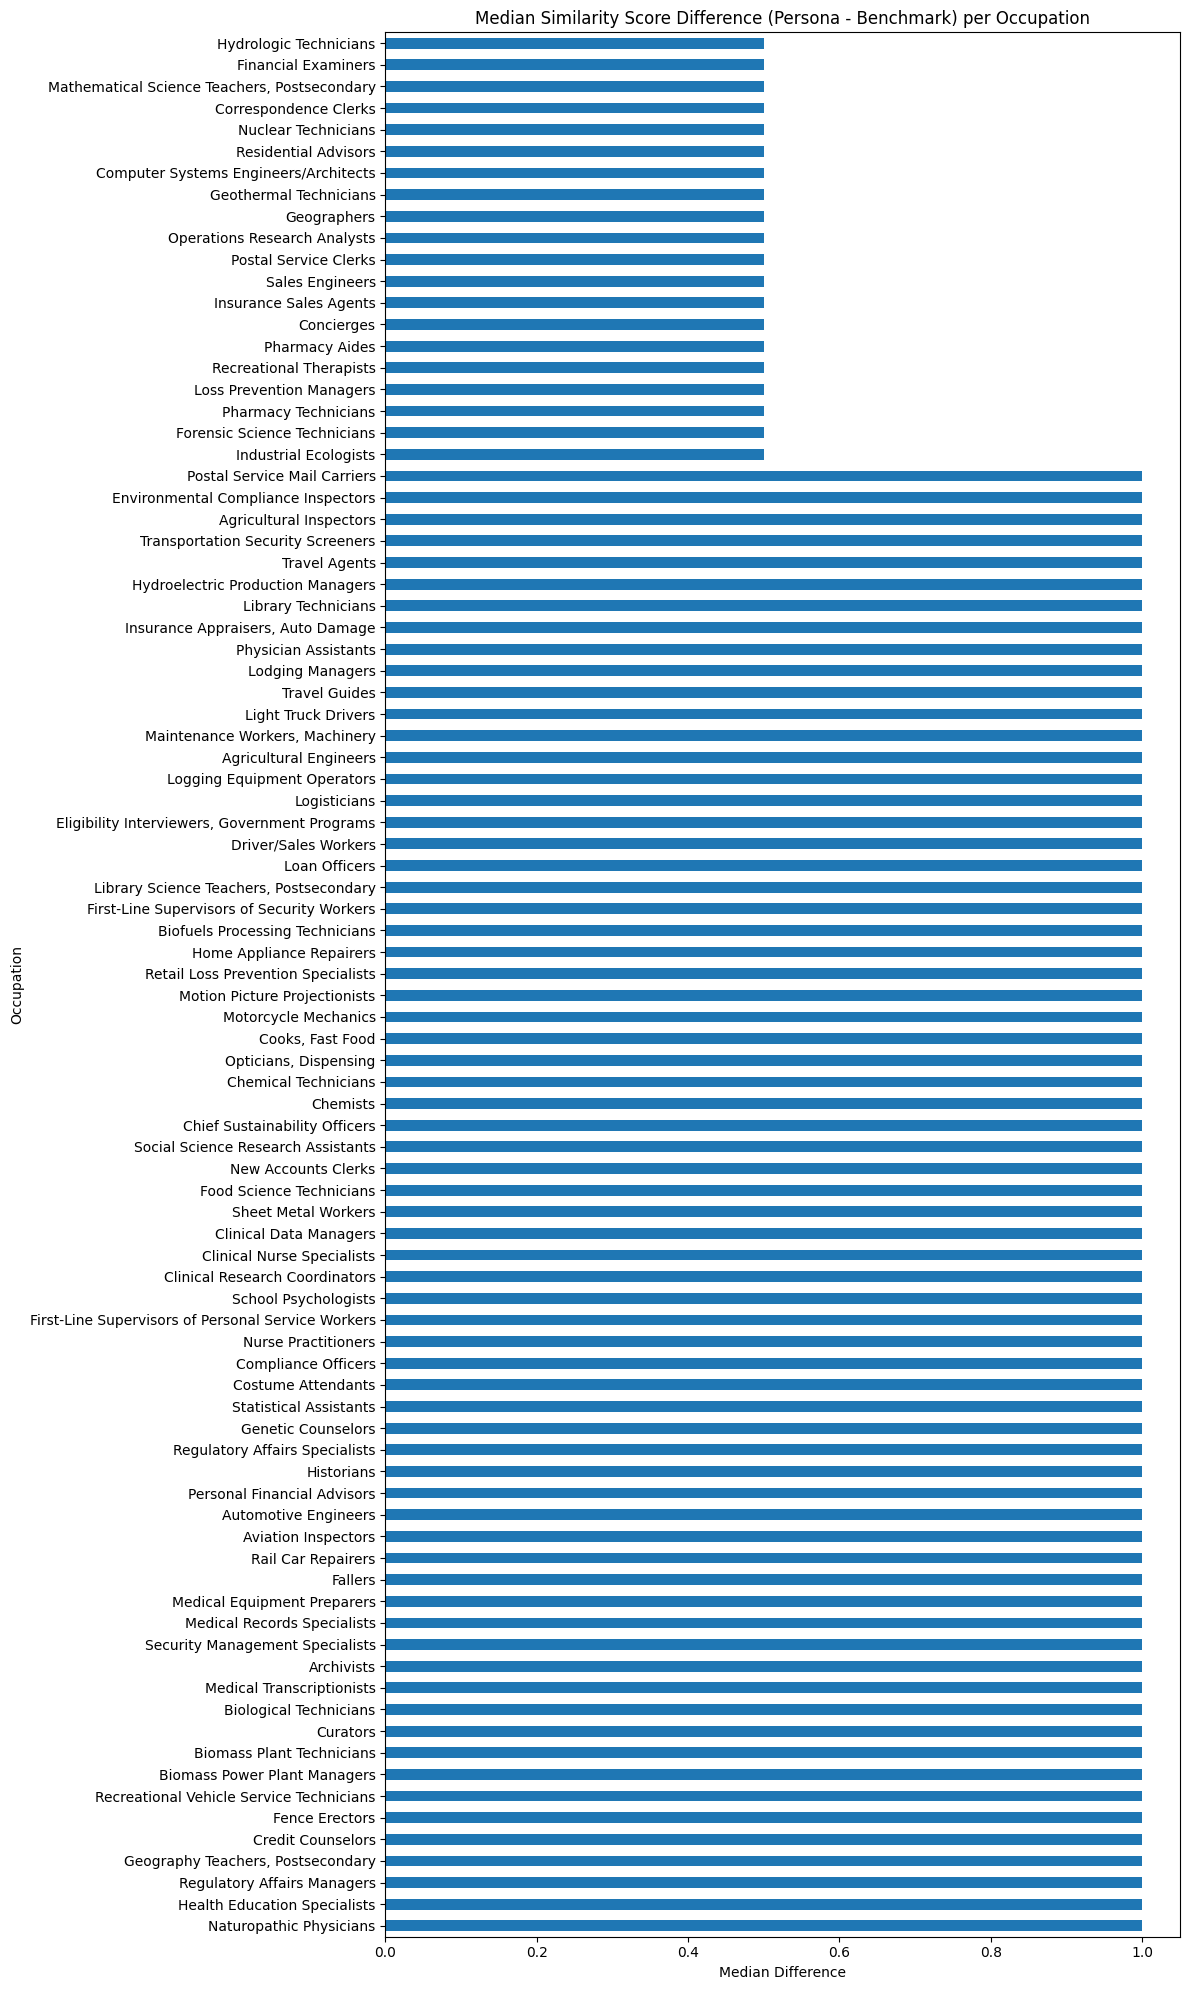

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

median_diff_per_occupation = df_pivot.groupby('title')['absolute_difference'].median().sort_values(ascending=False)
#drop the rows with 0 values
median_diff_per_occupation = median_diff_per_occupation[median_diff_per_occupation != 0]

plt.figure(figsize=(12, 20))  # Adjust figure size as needed
median_diff_per_occupation.plot(kind='barh')
plt.title('Median Similarity Score Difference (Persona - Benchmark) per Occupation')
plt.xlabel('Median Difference')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

Magnitude of Change in Average Similarity Score per Occupation:
prompt                                         benchmark_avg  persona_avg  \
title                                                                       
Environmental Compliance Inspectors                      0.0          1.0   
Postal Service Mail Carriers                             0.0          1.0   
Eligibility Interviewers, Government Programs            0.0          1.0   
Postal Service Clerks                                    0.0          1.0   
Recreational Vehicle Service Technicians                 0.0          1.0   
New Accounts Clerks                                      0.0          1.0   
Medical Records Specialists                              0.0          1.0   
Agricultural Inspectors                                  0.0          1.0   
Electromechanical Equipment Assemblers                   0.0          1.0   
Agricultural Engineers                                   0.0          1.0   
Credit Couns

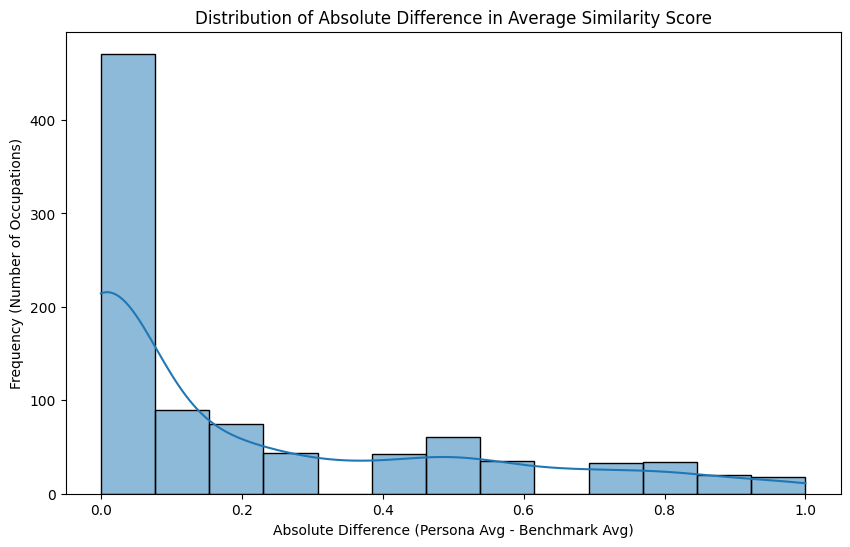

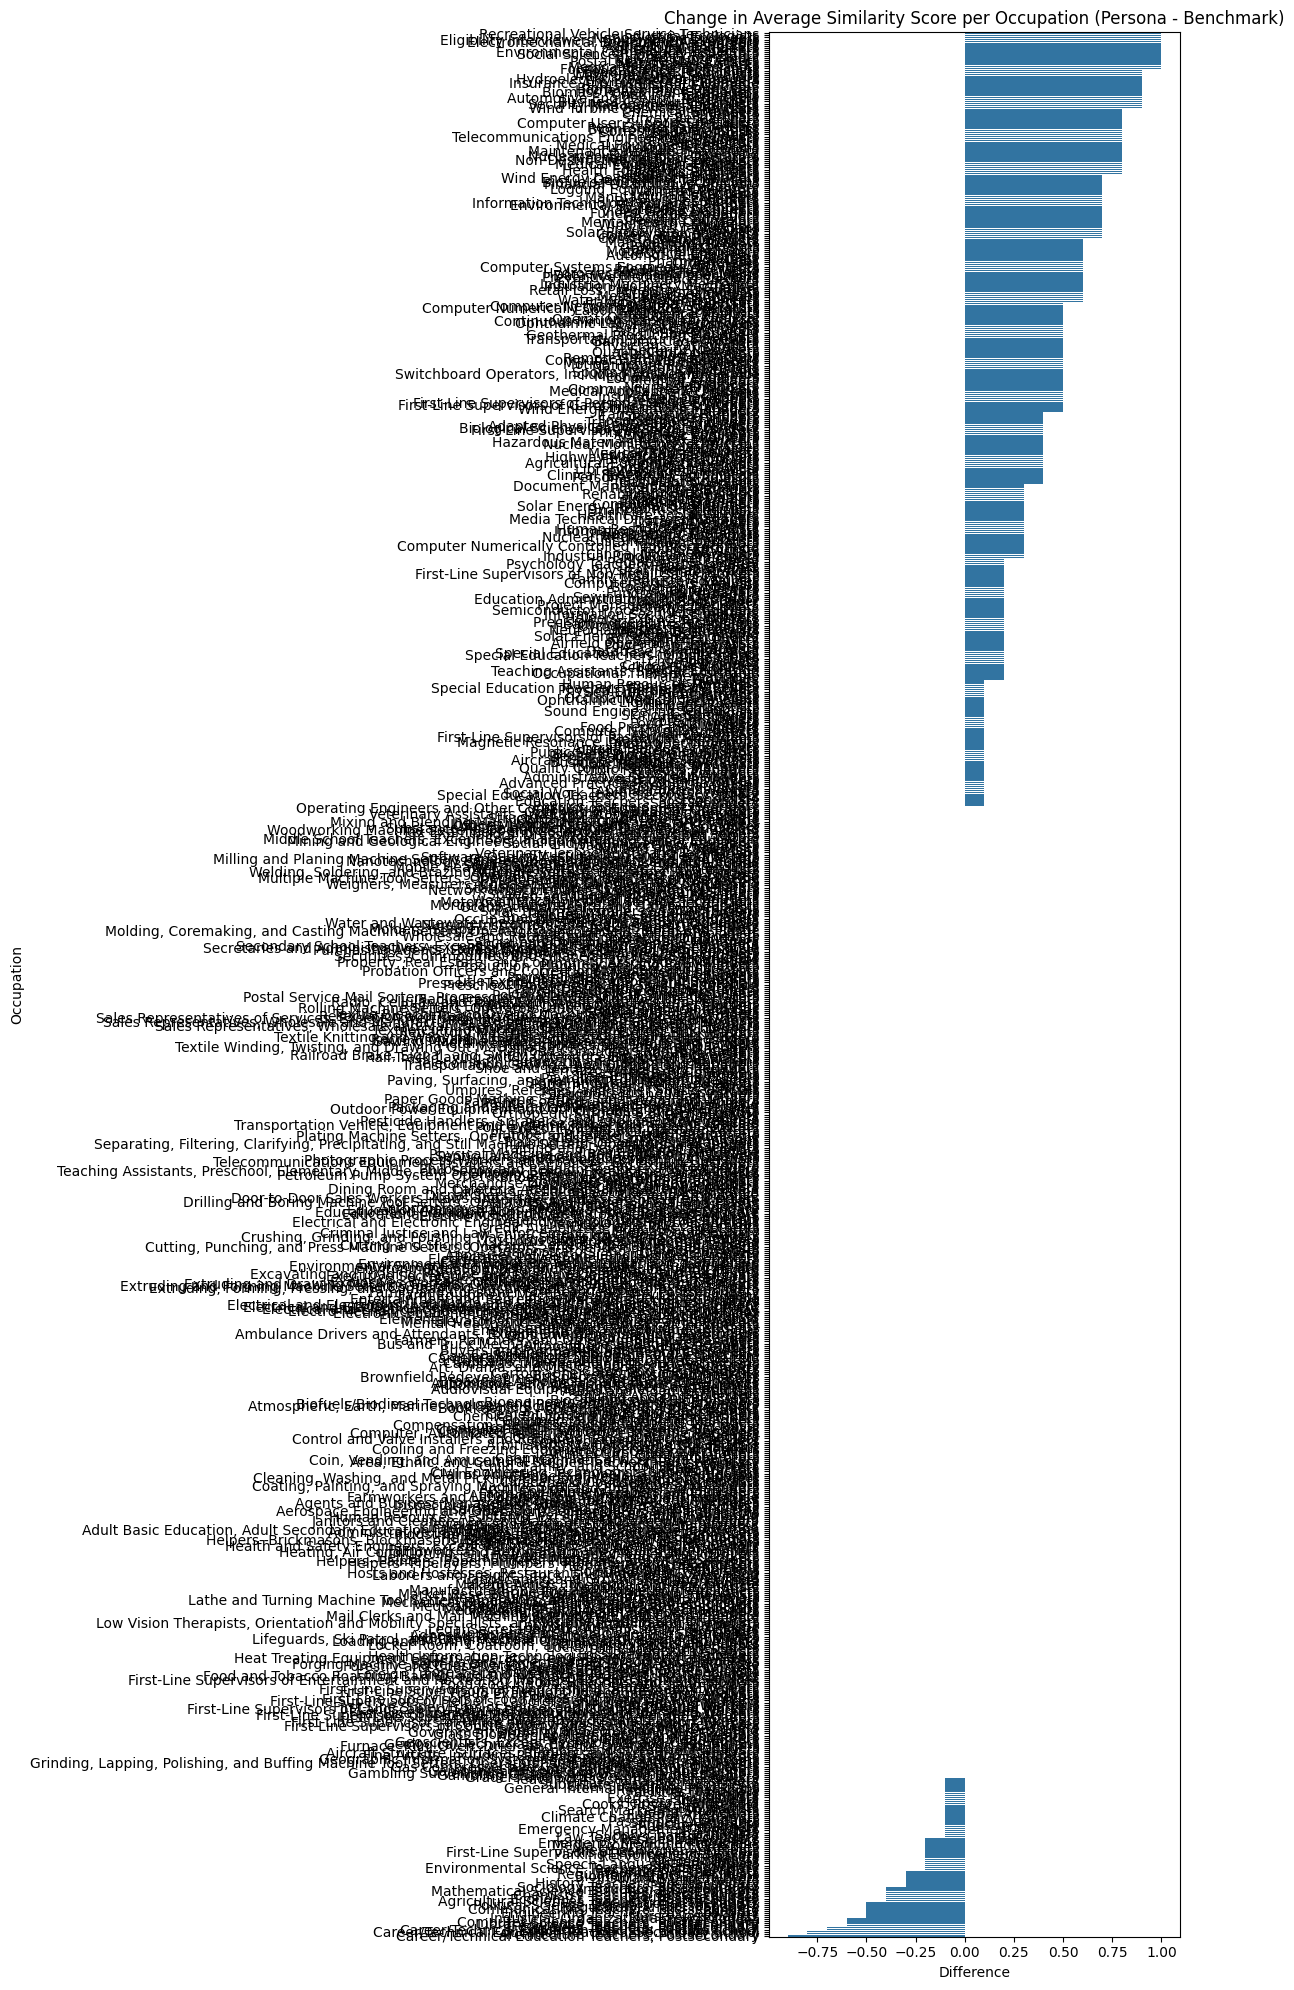

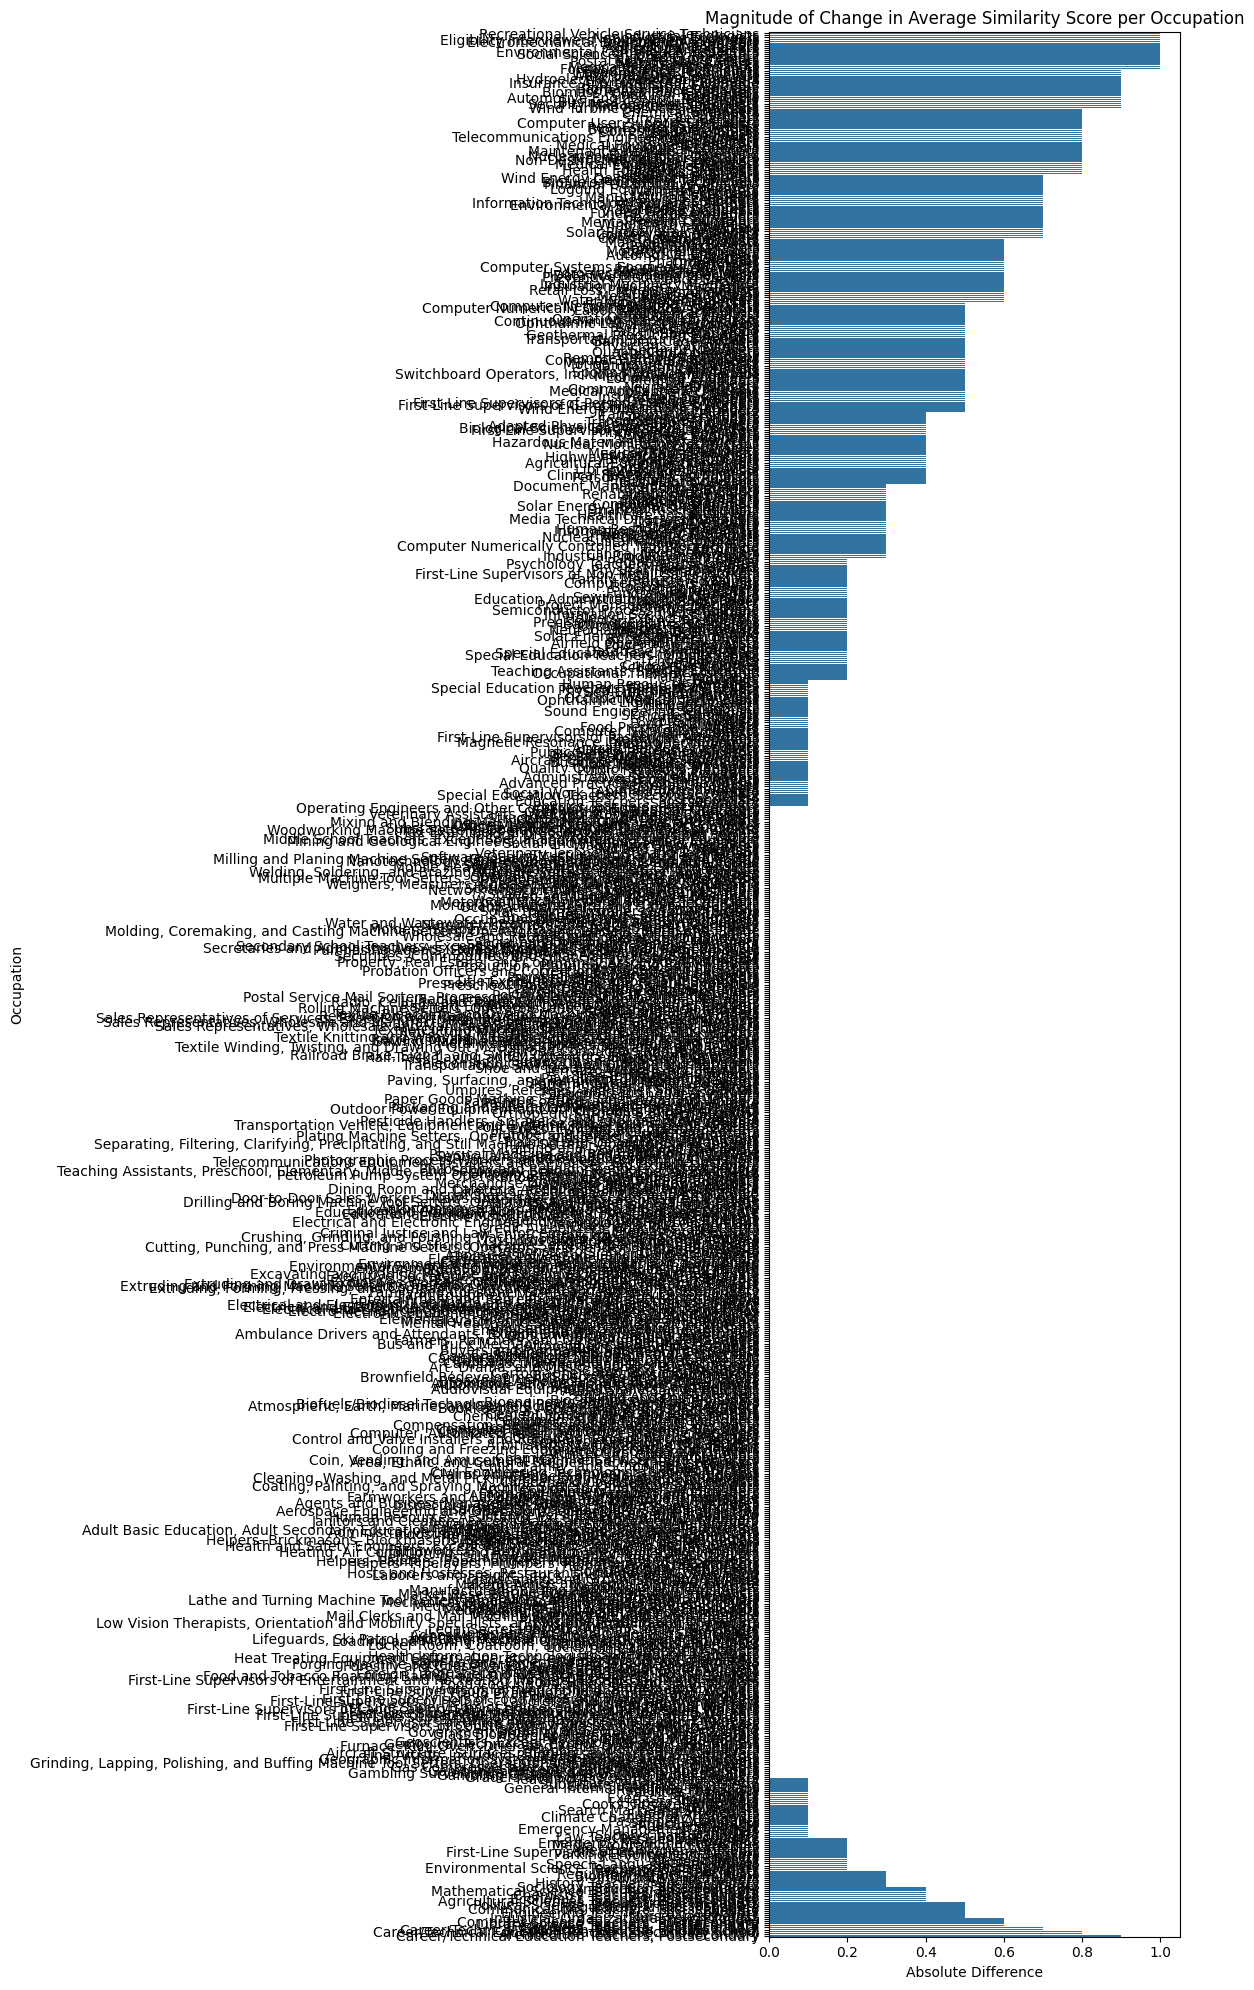

In [18]:
import pandas as pd

# Assuming you have the dataframe 'df' as in your initial example
df_avg_3b = df[df["model"] == "llama3b"].copy()
# Calculate the average similarity score for benchmark and persona for each occupation
df_avg_3b = df_avg_3b.groupby(['title', 'prompt'])['correct_match'].mean().unstack()
df_avg_3b = df_avg_3b.rename(columns={'benchmark': 'benchmark_avg', 'persona': 'persona_avg'})
df_avg_3b['difference'] = df_avg_3b['persona_avg'] - df_avg_3b['benchmark_avg']
df_avg_3b['absolute_difference'] = abs(df_avg_3b['difference'])

# Sort by absolute difference to see jobs with the largest magnitude of change
magnitude_of_change = df_avg_3b.sort_values(by='absolute_difference', ascending=False)

print("Magnitude of Change in Average Similarity Score per Occupation:")
print(magnitude_of_change[['benchmark_avg', 'persona_avg', 'difference', 'absolute_difference']].head(20))

# To get a sense of the distribution of these magnitudes:
print("\nSummary Statistics of Absolute Differences:")
print(magnitude_of_change['absolute_difference'].describe())

# You can also visualize this distribution using a histogram:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(magnitude_of_change['absolute_difference'], kde=True)
plt.title('Distribution of Absolute Difference in Average Similarity Score')
plt.xlabel('Absolute Difference (Persona Avg - Benchmark Avg)')
plt.ylabel('Frequency (Number of Occupations)')
plt.show()

# To visualize the change for each job (showing direction):
sorted_by_difference = df_avg_3b.sort_values(by='difference', ascending=False)

plt.figure(figsize=(12, 20))  # Adjust figure size as needed
sns.barplot(data=sorted_by_difference, x='difference', y=sorted_by_difference.index)
plt.title('Change in Average Similarity Score per Occupation (Persona - Benchmark)')
plt.xlabel('Difference')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 20))  # Adjust figure size as needed
sns.barplot(data=sorted_by_difference, x='absolute_difference', y=sorted_by_difference.index)
plt.title('Magnitude of Change in Average Similarity Score per Occupation')
plt.xlabel('Absolute Difference')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

### Recall

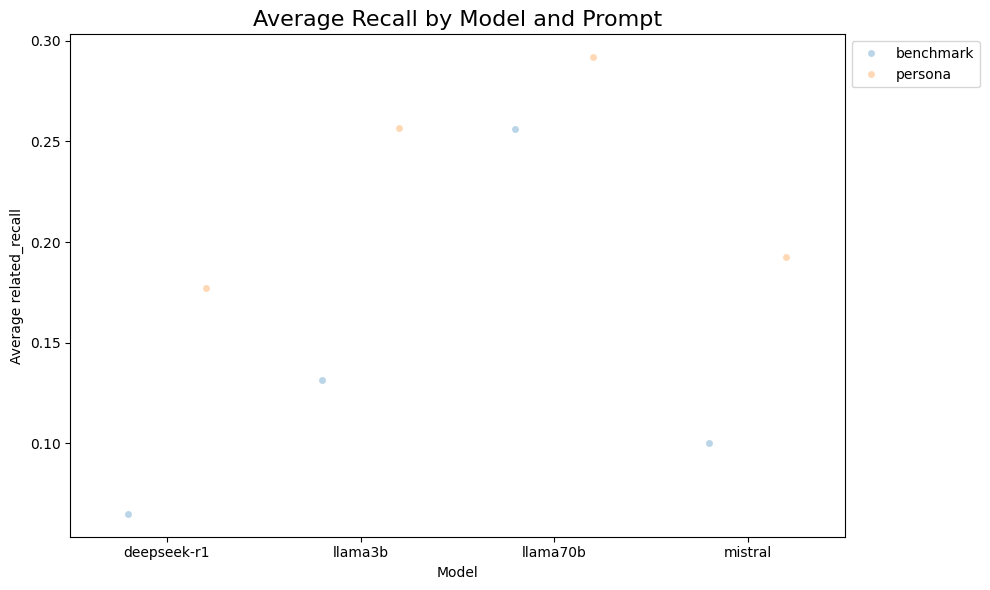

In [22]:
# Calculate the average related_recall for each model and prompt
avg_hits = df.groupby(["model", "prompt"])["related_recall"].mean().reset_index()

# Create a single barplot
plt.figure(figsize=(10, 6))
# sns.violinplot(data=df_avg, x="model", y="related_recall", hue="prompt", bw_adjust=3)
sns.stripplot(data=avg_hits, x="model", y="related_recall", hue="prompt", dodge=True, 
              size=5, alpha=0.3, jitter=True)

# Add labels and title
plt.title("Average Recall by Model and Prompt", fontsize=16)
plt.xlabel("Model")
plt.ylabel("Average related_recall")
 # Ensure some padding on the y-axis, no box around the legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()